### Thompson split plots

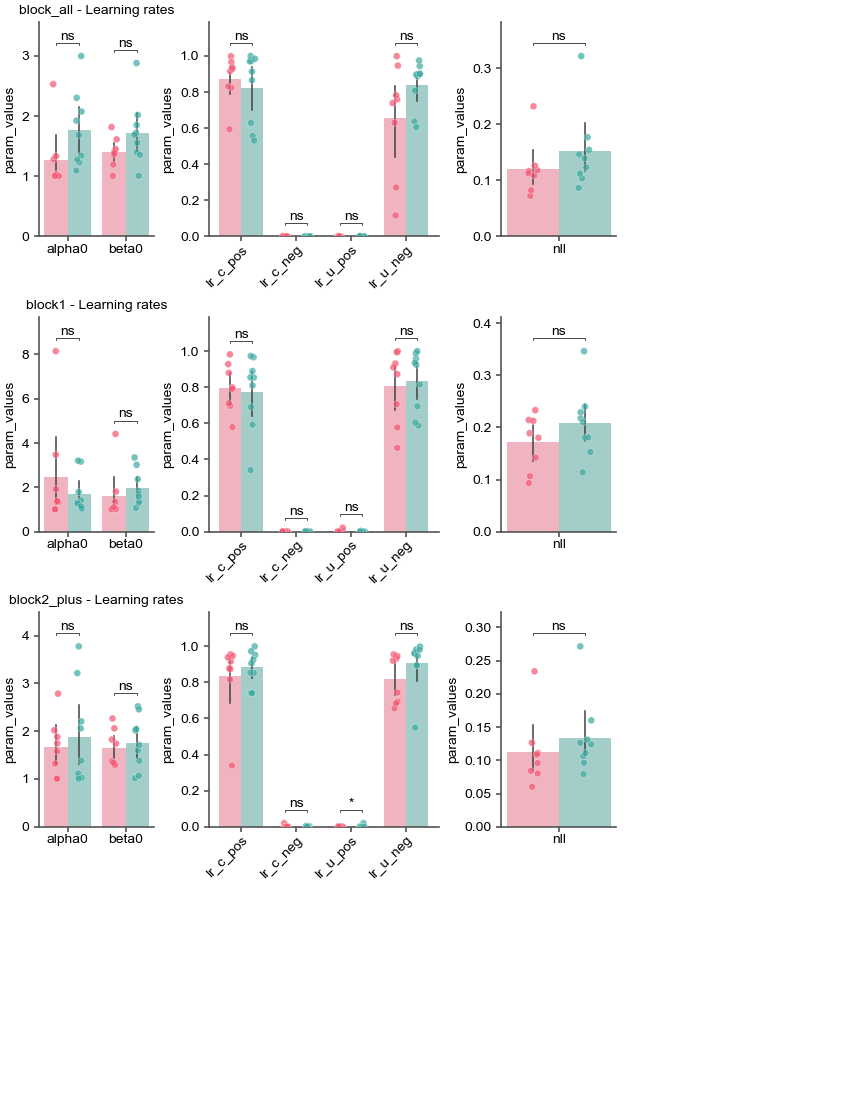

In [11]:
import mab_subjects
from neuropy import plotting
from statplotannot.plots import SeabornPlotter
from statplotannot.plots.plot_utils import xtick_format
from mab_colors import Palette2Arm

data_df = mab_subjects.GroupData().fit_thompson_split.latest
fig = plotting.Fig(4, 6, fontsize=10)
palette = Palette2Arm().as_dict()
strip_kw = dict(size=5, linewidth=0.3, alpha=0.7, palette=palette)
bar_kw = dict(alpha=0.5, palette=palette)

for i, block in enumerate(["block_all", "block1", "block2_plus"]):
    scope_df = data_df[data_df["fit_scope"] == block]

    alpha_df = scope_df[scope_df["param_names"].isin(["alpha0", "beta0"])]
    lr_df = scope_df[
        scope_df["param_names"].isin(["lr_c_pos", "lr_c_neg", "lr_u_pos", "lr_u_neg"])
    ]
    tau_df = scope_df[scope_df["param_names"].isin(["tau"])]

    nll_df = scope_df.loc[scope_df["param_names"] == "nll"].copy()
    trial_vals = scope_df.loc[
        scope_df["param_names"] == "n_trials", "param_values"
    ].to_numpy()

    nll_df.loc[:, "param_values"] = nll_df["param_values"].to_numpy() / trial_vals

    plot_kw = dict(
        x="param_names", y="param_values", hue="grp", hue_order=["unstruc", "struc"]
    )

    fig_pos = [fig.gs[i, 0], fig.gs[i, 1:3], fig.gs[i, 3]]
    for p, param_df in enumerate([alpha_df, lr_df, nll_df]):

        ax = fig.subplot(fig_pos[p])
        SeabornPlotter(data=param_df, ax=ax, **plot_kw).stripplot(**strip_kw).barplot(
            **bar_kw
        ).bootstrap_test()

        ax.set_xlabel("")
        ax.legend_.remove()

        if p == 0:
            ax.set_title(f"{block} - Learning rates")
        if p == 1:
            xtick_format(ax, rotation=45)

In [3]:
df

,name,param_names,param_values,fit_scope,grp,dataset,lesion
0,BGM0,alpha0,1.018024,block_all,unstruc,BGdataset,naive
1,BGM0,beta0,1.413543,block_all,unstruc,BGdataset,naive
2,BGM0,tau,0.704529,block_all,unstruc,BGdataset,naive
3,BGM0,lr_c_pos,0.82405,block_all,unstruc,BGdataset,naive
4,BGM0,lr_c_neg,0.000381,block_all,unstruc,BGdataset,naive
...,...,...,...,...,...,...,...
709,Xavi,bic,10388.010133,block2_plus,struc,ACdataset,naive
710,Xavi,n_trials,39300,block2_plus,struc,ACdataset,naive
711,Xavi,fit_fval_mean,5608.307896,block2_plus,struc,ACdataset,naive
712,Xavi,fit_fval_std,370.092356,block2_plus,struc,ACdataset,naive


### Plotting alpha0 and beta0 across grps

In [ ]:
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm

file = Path("D:/Data/mab/thomp_params3.csv")
df = pd.read_csv(file)
df["alpha0/beta0"] = df["alpha0"] / df["beta0"]
df["alpha0/(alpha0+beta0)"] = df["alpha0"] / (df["alpha0"] + df["beta0"])

df = pd.melt(
    df,
    id_vars=["grp"],
    value_vars=["alpha0", "beta0", "alpha0/beta0", "alpha0/(alpha0+beta0)"],
    value_name="param_values",
    var_name="param",
)

fig = plotting.Fig(5, 5)

ax = fig.subplot(fig.gs[0])
sns.stripplot(
    data=df,
    x="param",
    y="param_values",
    hue="grp",
    dodge=True,
    alpha=0.5,
    size=3,
    palette=["k"],
)
SeabornPlotter(
    data=df, x="param", y="param_values", hue="grp", hue_order=["unstruc", "struc"]
).barplot(palette=colors_2arm(1.2), errorbar="se").bootstrap_test(n_resamples=10000)
ax.get_legend().remove()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from neuropy import plotting

alphas = [5, 1, 2]
betas = [25, 1, 18]


fig = plotting.Fig(5, 3)

for i, (a, b) in enumerate(zip(alphas, betas)):

    ax = fig.subplot(fig.gs[0, i])
    vals = np.random.beta(a, b, size=10000)
    ax.hist(vals, bins=100, density=True, alpha=0.5, color="blue")
    ax.set_xlim(0, 1)

### Thompson sampling with forgetting

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
from statplotannot.plots import fix_legend

file = Path("D:/Data/mab/thomp_params_lr_tau2.csv")
df = pd.read_csv(file, sep=",")
df1 = df.copy()
df = df[df["first_experience"] == True]
df["lr_mean"] = (df["lr1"] + df["lr2"]) / 2
df["lr_relative"] = np.abs(df["lr1"] - df["lr2"]) / (df["lr1"] + df["lr2"])


df = pd.melt(
    df,
    id_vars=["grp", "sub_name", "first_experience"],
    var_name="param",
    value_name="value",
)
df = df[df["param"] != "bic"]

fig = plotting.Fig(5, 4, fontsize=10)

ax = fig.subplot(fig.gs[1])
SeabornPlotter(
    data=df, x="param", y="value", hue="grp", hue_order=["unstruc", "struc"]
).barplot(palette=colors_2arm(1.2), errorbar="se").bootstrap_test(n_resamples=10000)

sns.stripplot(
    data=df,
    x="param",
    y="value",
    hue="grp",
    dodge=True,
    alpha=0.5,
    size=3,
    palette=["k", "k"],
)
ax.set_xlabel("")
ax.set_ylabel("Parameter values")
ax.set_title("Thompson Sampling fitting")
ax.tick_params(rotation=90)
ax.set_ylim(0, 9)
fix_legend(ax)

### Thompson sampling with forgetting

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
from statplotannot.plots import fix_legend

file = Path("D:/Data/mab/thomp_params_lr_split1.csv")
df = pd.read_csv(file, sep=",")
df1 = df.copy()
df = df[df["first_experience"] == True]
df["alpha0_beta0_asymmetry"] = np.abs(df["alpha0"] - df["beta0"]) / (
    df["alpha0"] + df["beta0"]
)

dflr = pd.DataFrame()
dflr["(c+ + c-) / (u+ + u-)"] = df["lr_c_pos"] + df["lr_c_neg"] / (
    df["lr_u_pos"] + df["lr_u_neg"]
)
dflr["(c- + u-) / (c+ + u+)"] = df["lr_c_neg"] + df["lr_u_neg"] / (
    df["lr_c_pos"] + df["lr_u_pos"]
)
dflr["grp"] = df["grp"]

df = pd.melt(
    df,
    id_vars=["grp", "sub_name", "first_experience"],
    var_name="param",
    value_name="value",
)

dflr = pd.melt(
    dflr,
    id_vars=["grp"],
    var_name="param",
    value_name="value",
)

df = df[df["param"] != "bic"]
df = df[df["param"] != "alpha0"]
df = df[df["param"] != "beta0"]


fig = plotting.Fig(5, 8, fontsize=10)

ax = fig.subplot(fig.gs[1:3])
SeabornPlotter(
    data=df, x="param", y="value", hue="grp", hue_order=["unstruc", "struc"]
).barplot(palette=colors_2arm(1.2), errorbar="se").bootstrap_test(n_resamples=10000)

sns.stripplot(
    data=df,
    x="param",
    y="value",
    hue="grp",
    dodge=True,
    alpha=0.5,
    size=3,
    palette=["k", "k"],
)

ax.set_xlabel("")
ax.set_ylabel("Parameter values")
ax.set_title("Thompson Sampling fitting")
ax.tick_params(rotation=90)
# ax.set_ylim(0, 9)
# fix_legend(ax)
ax.get_legend().remove()

ax = fig.subplot(fig.gs[5])
SeabornPlotter(
    data=dflr, x="param", y="value", hue="grp", hue_order=["unstruc", "struc"]
).barplot(palette=colors_2arm(1.2), errorbar="se").bootstrap_test(n_resamples=10000)

sns.stripplot(
    data=dflr,
    x="param",
    y="value",
    hue="grp",
    dodge=True,
    alpha=0.5,
    size=3,
    palette=["k", "k"],
)

ax.set_xlabel("")
ax.set_ylabel("Parameter values")
ax.set_title("Thompson Sampling fitting")
ax.tick_params(rotation=90)
# ax.set_ylim(0, 9)
# fix_legend(ax)
ax.get_legend().remove()

In [ ]:
import numpy as np
from banditpy.core import Bandit2Arm
from banditpy.plots import plot_trial_by_trial_2Arm
from neuropy import plotting

n_sim = 500
# probs = np.arange(0.1, 1, 0.1)
probs = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9]


def run_thomp2(alpha0, beta0, lr_c_pos, lr_u_neg, lr_c_neg, lr_u_pos, tau):

    choices = []
    rewards = []
    reward_probs = []
    session_ids = []
    env_type = ""

    for i in range(100):
        rand_env = np.random.rand()
        if rand_env <= 0.5:
            reward_probs_i = [p := np.random.choice(probs), 1 - p]
            env_type = "structured"
        else:
            reward_probs_i = np.random.choice(probs, size=2, replace=False)
            env_type = "unstructured"

        alpha = np.ones(2)
        beta = np.ones(2)
        s = np.zeros(2)
        f = np.zeros(2)

        for tr in range(100):
            alpha = alpha0 + s
            beta = beta0 + f

            samples = np.random.beta(alpha[:, None], beta[:, None], size=(2, n_sim))
            selected = np.argmax(samples, axis=0)
            choice_prob = np.array([1 - selected.mean(), selected.mean()])
            choice = np.random.choice([0, 1], p=choice_prob)
            random_num = np.random.rand()

            s = tau * s
            f = tau * f

            if random_num < reward_probs_i[choice]:
                s[choice] += lr_c_pos
                f[1 - choice] += lr_u_neg
                rewards.append(1)
            else:
                f[choice] += lr_c_neg
                s[1 - choice] += lr_u_pos
                rewards.append(0)

            choices.append(choice)
            session_ids.append(i)
            reward_probs.append(reward_probs_i)

    choices = np.array(choices)
    rewards = np.array(rewards)
    reward_probs = np.array(reward_probs)
    session_ids = np.array(session_ids)

    return choices, rewards, reward_probs, session_ids, env_type


fig = plotting.Fig(8, 4, fontsize=10)

params = [
    [1, 1, 0.8, 0.6, 0.8, 0.4, 0.8],
    [2, 1, 0.5, 0.5, 0.4, 0.3, 0.8],
    [1, 2, 0.1, 0.8, 0.7, 0.2, 0.8],
    # [5, 5, 0.2, 0.3, 0.7],
]
for i, (alpha0, beta0, lr_c_pos, lr_u_neg, lr_c_neg, lr_u_pos, tau) in enumerate(
    params
):
    choices, rewards, reward_probs, session_ids, env_type = run_thomp2(
        alpha0, beta0, lr_c_pos, lr_u_neg, lr_c_neg, lr_u_pos, tau
    )
    task = Bandit2Arm(
        probs=reward_probs, choices=choices, rewards=rewards, session_ids=session_ids
    )
    perf = task.get_optimal_choice_probability()
    ax = fig.subplot(fig.gs[:3, i])
    plot_trial_by_trial_2Arm(task, ax=ax, sort_by_deltaprob=True)
    ax.set_title(
        f"env_type={env_type},\nalpha={alpha0}, beta={beta0},\nlr_c_pos={lr_c_pos}, lr_u_neg={lr_u_neg},\nlr_c_neg={lr_c_neg}, lr_u_pos={lr_u_pos},\ntau={tau}"
    )

    ax2 = fig.subplot(fig.gs[3, i])
    ax2.plot(np.arange(100), perf, color="k")
    ax2.set_ylim(0.4, 1.0)
    ax2.set_xlabel("Trial")
    ax2.set_ylabel("Pr(High)")
    ax2.grid(axis="y")

### Shared learning rate lesioned group

In [ ]:
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
import mab_subjects
import numpy as np
from statplotannot.plots import fix_legend, xtick_format

# df = mab_subjects.GroupData().thomp_params_lr_shared_1stBlock_26112025_112008
df = mab_subjects.GroupData().thomp_params_lr_split_1stBlock_27112025_1532
df["alpha_beta_asym"] = np.abs(df["alpha0"] - df["beta0"]) / (
    df["alpha0"] + df["beta0"]
)

df = pd.melt(
    df,
    id_vars=["grp", "lesion"],
    value_vars=[
        "lr_c_pos",
        "lr_c_neg",
        "lr_u_pos",
        "lr_u_neg",
        "tau",
        "alpha_beta_asym",
    ],
    value_name="param_values",
    var_name="param",
)
df["grp_new"] = df["grp"] + "_" + df["lesion"]
hue_order = [
    "unstruc_pre_lesion",
    "unstruc_naive_lesion_OFC",
    "unstruc_post_lesion_OFC",
    "struc_pre_lesion",
    "struc_naive_lesion_OFC",
    "struc_post_lesion_OFC",
]
palette = ["#ed1212", "#f57979", "#faa9a9", "#1342ed", "#80a6f7", "#b0b4fc"]


fig = plotting.Fig(5, 5)

ax = fig.subplot(fig.gs[0, :2])
# sns.stripplot(
#     data=df,
#     x="param",
#     y="param_values",
#     hue="grp",
#     dodge=True,
#     alpha=0.5,
#     size=3,
#     palette=["k"],
# )
SeabornPlotter(
    data=df, x="param", y="param_values", hue="grp_new", hue_order=hue_order
).barplot(palette=palette, errorbar="se").bootstrap_test(
    exclude_pairs=["unstruc_post_lesion_OFC", "struc_post_lesion_OFC"]
)
ax.get_legend().remove()
# fix_legend(ax)
xtick_format(ax, rotation=45)

### Split learning rate impure group

In [11]:
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
import mab_subjects
import numpy as np
from statplotannot.plots import fix_legend, xtick_format

df = mab_subjects.GroupData().thomp_params_impure_lr_split_29112025_191608
df["alpha_beta_asym"] = np.abs(df["alpha0"] - df["beta0"]) / (
    df["alpha0"] + df["beta0"]
)

df = pd.melt(
    df,
    id_vars=["grp", "lesion"],
    value_vars=[
        "lr_c_pos",
        "lr_c_neg",
        "lr_u_pos",
        "lr_u_neg",
        "tau",
        "alpha_beta_asym",
    ],
    value_name="param_values",
    var_name="param",
)
hue_order = ["unstruc", "struc"]
palette = colors_2arm()


fig = plotting.Fig(4, 4, fontsize=10)

ax = fig.subplot(fig.gs[0, :2])
sns.stripplot(
    data=df,
    x="param",
    y="param_values",
    hue="grp",
    hue_order=hue_order,
    dodge=True,
    alpha=0.7,
    edgecolor="white",
    linewidth=0.5,
    size=5,
    palette=colors_2arm(),
)
SeabornPlotter(
    data=df, x="param", y="param_values", hue="grp", hue_order=hue_order
).barplot(palette=palette, errorbar="se", alpha=0.5).bootstrap_test()
ax.get_legend().remove()
# fix_legend(ax)
xtick_format(ax, rotation=45)

### TinyRNN d vs nll

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from neuropy import plotting
import seaborn as sns
from statplotannot.plots import SeabornPlotter
from mab_colors import colors_2arm
from statplotannot.plots import fix_legend

file = Path("D:/Data/mab/tinyRNN_results.csv")
df = pd.read_csv(file, sep=",")
df1 = df.copy()
df = df[df["first_experience"] == True]

fig = plotting.Fig(5, 4, fontsize=10)
ax = fig.subplot(fig.gs[1])

SeabornPlotter(
    data=df,
    x="d",
    y="nll",
    hue="grp",
    hue_order=["unstruc", "struc"],
).pointplot(palette=colors_2arm(1.2), errorbar="se", dodge=0.3)
fix_legend(ax)

ax.set_ylim(0.14, 0.25)